<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/Actividad%20Semanal%20--%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Actividad Semanal -- 4**
>## **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)**
>## **Tecnológico de Monterrey**
>## **Prof: Jobish Vallikavungal Devassia**




### **Gerardo Aaron Castañeda Jaramillo  -  Matrícula A01137646**
### **Genaro Ramos Higuera  -  Matrícula A00351269**
### **5 de octubre del 2022**

## **Parte 1: Ejercicio guiado**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)
df.index.name = None

### Formato dado en anterior ejercicio a la base de datos

In [3]:
df_norm = df.copy()

#eliminamos valores mayores a 4 en X3 
X3_values = []
for i in range(0,len(df_norm.index)):
  if df_norm['X3'].iloc[i] > 4:
    if df_norm['X3'].iloc[i] not in X3_values:
      X3_values.append(int(df_norm['X3'].iloc[i]))
for i in X3_values:
  df_norm['X3'].replace(i,4,inplace=True)

#sustituimos valores de x3 de 0 por valor 4 de others
df_norm['X3'].replace(0,4,inplace=True)

#sustituimos valores de 0 en X4 por por 3, ya que entra dentro de el valor 3 = others
df_norm['X4'].replace(0,3,inplace=True)

#cambimos valores de -2 de X6 a X11 por -1
df_norm.iloc[:,5:11] = df_norm.iloc[:,5:11].replace(-2,-1)

#cambiamos valores negativos de X12 a X24
for col in df_norm.iloc[:,11:23].columns:
  df_norm[col] = df_norm[col].abs()

#eliminamos las filas con valores nulos, que representan 42/30000
df_norm.dropna(axis=0,inplace=True)

Cambiaremos los nombres de las columnas para su más fácil visualización

In [4]:
columns_name = ['BAL','SEX','EDUCATION','MARRIAGE','AGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1',
                'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Y']
df_norm.columns = columns_name
df_norm.columns

Index(['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'Y'],
      dtype='object')

Analizamos la base de datos con formato

## **Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

Comenzamos separando los valores de entrada al modelo de los valores Y

In [5]:
dfw = df_norm.copy()

Y_values = dfw['Y']
x_values = dfw.drop('Y',axis=1)

Primero utilizamos el método de preprocessing de "scale" para tener todas las columnas en una misma escala

In [6]:
prepross = preprocessing.scale(x_values)

Seguido evaluamos la proporción de la variancia de cada variable:

In [7]:
Varience = np.cov(prepross)
Varience

array([[ 0.73029859,  0.14995265,  0.06487096, ...,  0.6641227 ,
         0.02879403, -0.04942582],
       [ 0.14995265,  0.69672633,  0.18226021, ...,  0.17350501,
        -0.40750588, -0.08093353],
       [ 0.06487096,  0.18226021,  0.13632097, ...,  0.07946293,
        -0.13107501, -0.05885036],
       ...,
       [ 0.6641227 ,  0.17350501,  0.07946293, ...,  1.56252713,
        -0.04221304,  0.10981582],
       [ 0.02879403, -0.40750588, -0.13107501, ..., -0.04221304,
         1.89579674,  0.15224163],
       [-0.04942582, -0.08093353, -0.05885036, ...,  0.10981582,
         0.15224163,  0.21947116]])

In [31]:
t= prepross.var().sum()
total = 0
for i in range(0,len(prepross[0])-1):
  total = total + Varience[i][i]
print('Total Varience \t\t\t:', total.round(2))
min_val = total
minv_str = ''
max_val = 0
maxv_str = ''
x_val = 0
for i in range(0,len(prepross[0])-1):
  x_val = ((Varience[i][i]/total)*100).round(2)
  str_val = str(x_values.columns[i])
  if x_val > max_val:
    max_val = x_val
    maxv_str = x_values.columns[i]
  elif x_val < min_val:
    min_val = x_val
    minv_str = x_values.columns[i]
  print('Varience prop. of ' + str_val + ': ' + str(x_val) + '%' )

print('Min value is: ' + str(min_val) + '% in ' + minv_str)
print('Max value is: ' + str(max_val) + '% in ' + maxv_str)


Total Varience 			: 27.35
Varience prop. of BAL: 2.67%
Varience prop. of SEX: 2.55%
Varience prop. of EDUCATION: 0.5%
Varience prop. of MARRIAGE: 0.48%
Varience prop. of AGE: 2.28%
Varience prop. of PAYSTAT_1: 0.75%
Varience prop. of PAYSTAT_2: 29.39%
Varience prop. of PAYSTAT_3: 1.04%
Varience prop. of PAYSTAT_4: 1.77%
Varience prop. of PAYSTAT_5: 1.64%
Varience prop. of PAYSTAT_6: 1.86%
Varience prop. of BILL_1: 3.23%
Varience prop. of BILL_2: 3.49%
Varience prop. of BILL_3: 2.66%
Varience prop. of BILL_4: 0.83%
Varience prop. of BILL_5: 3.02%
Varience prop. of BILL_6: 4.35%
Varience prop. of PAY_1: 30.74%
Varience prop. of PAY_2: 1.27%
Varience prop. of PAY_3: 1.44%
Varience prop. of PAY_4: 0.85%
Varience prop. of PAY_5: 3.2%
Min value is: 0.48% in MARRIAGE
Max value is: 30.74% in PAY_1


Donde podemos ver que, de las variables, la de mayor importancia es PAY_1 con un 30.74%, y la de menor importancia es MARRIAGE con 0.48%

Y ahora utilizamos el método de PCA

In [116]:
pcs = PCA()
pcs.fit(prepross) 

PCA()

Presentamos la variación estándar, la proporción de la variancia, y la proporción cumulativa en base los componentes principales

In [117]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5123,2.0276,1.2398,1.2102,1.0128,0.9874,0.9592,0.9423,0.9327,0.8852,...,0.7247,0.6569,0.5467,0.5033,0.4772,0.4088,0.2668,0.2016,0.1603,0.1536
Proportion of variance,0.2744,0.1787,0.0668,0.0637,0.0446,0.0424,0.0400,0.0386,0.0378,0.0341,...,0.0228,0.0188,0.0130,0.0110,0.0099,0.0073,0.0031,0.0018,0.0011,0.0010
Cumulative proportion,0.2744,0.4532,0.5200,0.5837,0.6283,0.6706,0.7106,0.7492,0.7871,0.8211,...,0.9331,0.9518,0.9648,0.9758,0.9857,0.9930,0.9961,0.9979,0.9990,1.0000


Evaluamos en base a la proporción cumulativa cuantos componentes principales son necesarios para llegar a una variabilidad arriba al 90%

In [105]:
pcsSummary_df.iloc[2,12].round(4)*100

91.02

In [106]:
(1 - pcsSummary_df.iloc[2,12]).round(4)*100

8.98

In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt

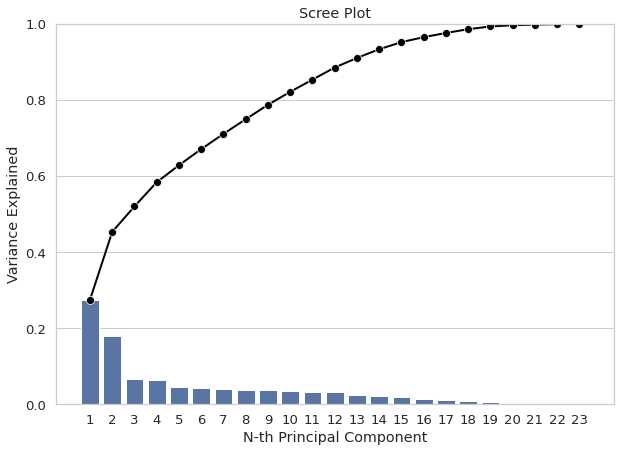

In [108]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

*   El primer componente principal abarca únicamente un 27% de la variabilidad
*   Es necesario abarcar hasta PC12 para llegar a un 91% de variabilidad
*   Reducir el número de variables a menos de 12 significaría una pérdida de variabilidad considerable
*   Existe una pérdida de variación del 8.98% incluyendo 12 componentes principales

### El numero **mínimo de componentes principales** para el modelo son **12**

## **Paso 2: Interprete cada componente principal en términos de las variables originales**

Comenzamos usando el método de .transpose() para acomodar los componentes principales en las columnas, contra los nombres de las columnas de la base de datos original. Para así poder visualizar el impacto de las variables originales sobre los componentes principales.

In [46]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=x_values.columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
BAL,0.091638,0.296007,0.002024,0.086406,-0.201029,-0.389330,0.116019,-0.022836,0.014463,0.011844,-0.004662,0.021619
SEX,-0.020013,0.030720,0.035849,-0.076578,0.836091,-0.493731,0.047998,-0.000020,0.010955,0.025464,0.022366,-0.050790
EDUCATION,0.011833,-0.097039,-0.351762,0.181227,0.423404,0.529667,-0.366899,-0.000865,-0.127883,0.065020,-0.111696,0.156625
MARRIAGE,-0.011474,-0.036329,0.515563,-0.367047,-0.022137,0.285825,-0.149363,-0.009720,-0.047898,0.039708,-0.071067,0.074967
AGE,0.020404,0.056296,-0.532613,0.388699,-0.159246,-0.059272,0.075586,-0.006081,0.037601,0.008580,-0.035022,-0.000125
PAYSTAT_1,0.136321,-0.312537,-0.006848,0.035161,-0.035000,-0.053352,-0.159410,0.046131,-0.031185,0.008681,0.383698,-0.438556
PAYSTAT_2,0.160257,-0.349301,0.013882,0.055486,-0.044026,-0.064132,-0.161291,0.045825,-0.034420,0.015089,0.277703,-0.297440
PAYSTAT_3,0.163160,-0.359891,0.054066,0.094227,-0.031728,-0.073836,-0.047687,-0.002083,-0.027427,-0.025352,-0.040645,-0.175681
PAYSTAT_4,0.168784,-0.364645,0.076496,0.124406,-0.019252,-0.089147,0.063530,-0.071834,0.034195,-0.081082,-0.135696,0.157265
PAYSTAT_5,0.173542,-0.352703,0.094631,0.132065,-0.008082,-0.079570,0.158101,-0.063029,0.063610,0.076649,-0.198053,0.287131


Ahora evaluamos las variables con el mayor valor absoluto en los coeficientes

In [80]:
for pc in pcsComponents_df.iloc[:,:12]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
BILL_4    0.369041
BILL_5    0.366819
BILL_3    0.364778
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PAYSTAT_4   -0.364645
PAYSTAT_3   -0.359891
PAYSTAT_5   -0.352703
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
AGE         -0.532613
MARRIAGE     0.515563
EDUCATION   -0.351762
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
AGE         0.388699
MARRIAGE   -0.367047
PAY_2       0.358318
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
SEX          0.836091
EDUCATION    0.423404
BAL         -0.201029
Name: PC5, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC6
EDUCATION    0.529667
SEX         -0.493731
BAL         -0.389330
Name: PC6, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC7
PAY_5       -0.695526
EDUCATION  

Y donde podemos ver las 3 variables con mayor magnitud de cada componente principal

Ahora para los eigenvectors:

In [113]:
pcs.components_.round(3)

array([[ 0.092, -0.02 ,  0.012, -0.011,  0.02 ,  0.136,  0.16 ,  0.163,
         0.169,  0.174,  0.169,  0.349,  0.36 ,  0.365,  0.369,  0.367,
         0.36 ,  0.103,  0.087,  0.095,  0.086,  0.083,  0.078],
       [ 0.296,  0.031, -0.097, -0.036,  0.056, -0.313, -0.349, -0.36 ,
        -0.365, -0.353, -0.327,  0.107,  0.107,  0.112,  0.11 ,  0.108,
         0.107,  0.145,  0.135,  0.148,  0.138,  0.133,  0.125],
       [ 0.002,  0.036, -0.352,  0.516, -0.533, -0.007,  0.014,  0.054,
         0.076,  0.095,  0.096, -0.121, -0.1  , -0.064, -0.051, -0.039,
        -0.03 ,  0.236,  0.25 ,  0.232,  0.193,  0.16 ,  0.174],
       [ 0.086, -0.077,  0.181, -0.367,  0.389,  0.035,  0.055,  0.094,
         0.124,  0.132,  0.121, -0.187, -0.166, -0.114, -0.106, -0.093,
        -0.085,  0.32 ,  0.358,  0.319,  0.27 ,  0.205,  0.24 ],
       [-0.201,  0.836,  0.423, -0.022, -0.159, -0.035, -0.044, -0.032,
        -0.019, -0.008,  0.007, -0.012,  0.009,  0.037,  0.028,  0.025,
         0.008,  0.1

Donde podemos ver cada vector para cada componente principal

Ahora, para los eigenvalues:

In [114]:
pcs.explained_variance_.round(3)

array([6.312, 4.111, 1.537, 1.465, 1.026, 0.975, 0.92 , 0.888, 0.87 ,
       0.784, 0.739, 0.728, 0.581, 0.525, 0.432, 0.299, 0.253, 0.228,
       0.167, 0.071, 0.041, 0.026, 0.024])

Lo que nos dice la importancia de cada dirección de cada vector

## **Paso 3: Identifique valores atípicos**

Para identificar los valores atípicos generaremos graficas de boxplot de cada componente principal

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt

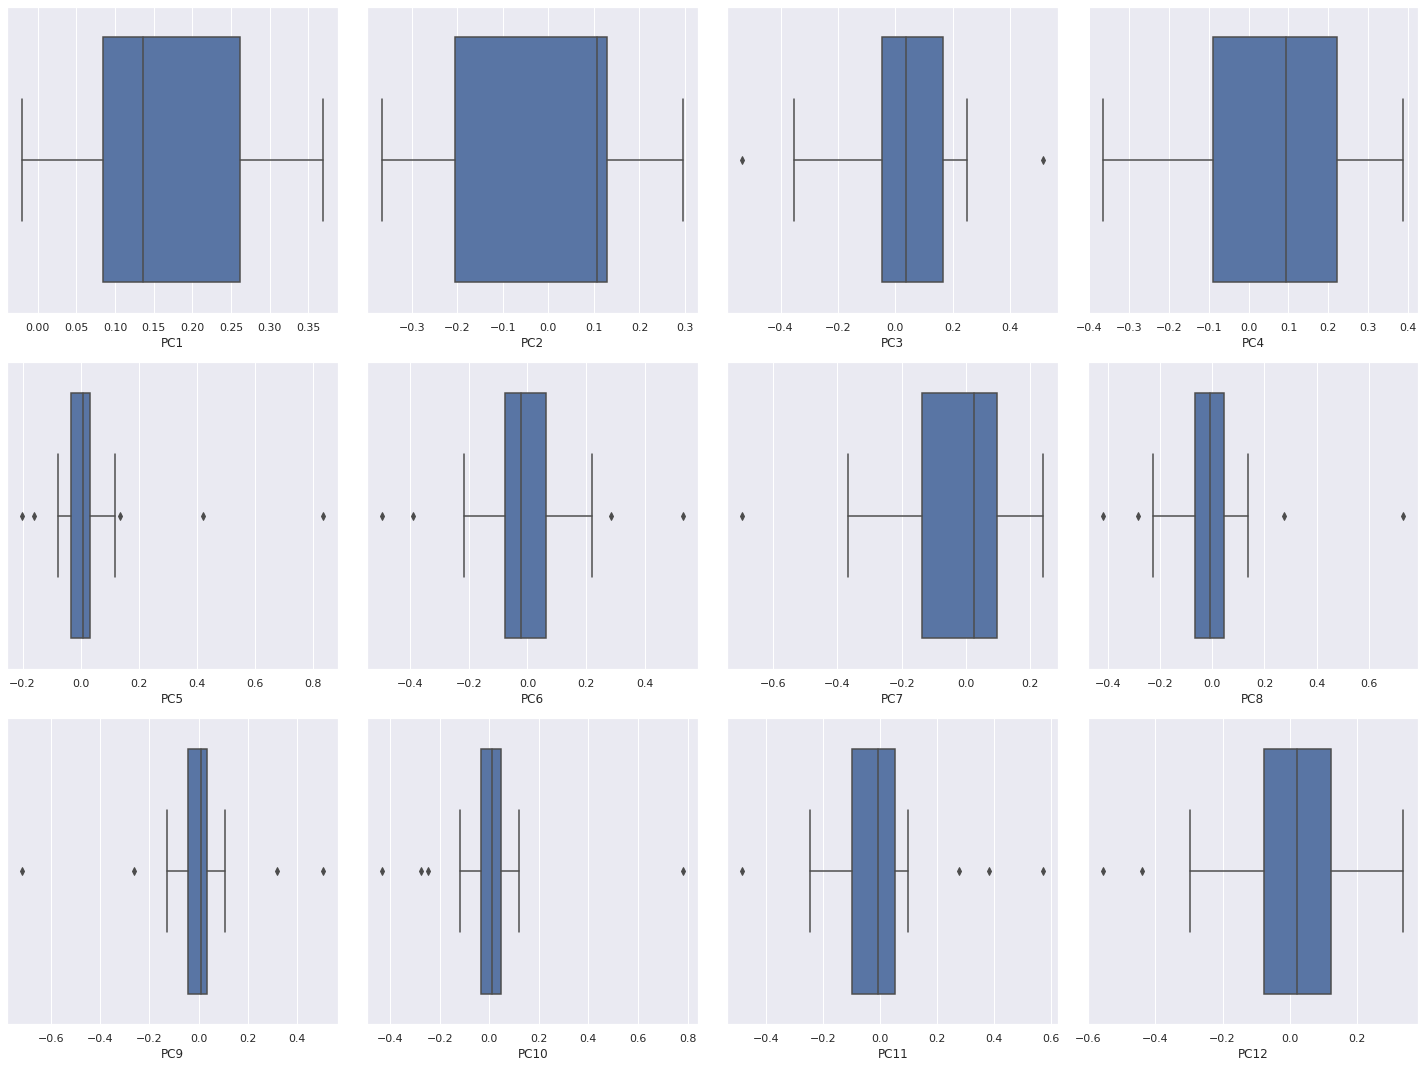

In [101]:
sns.set(rc={'figure.figsize':(20,15)})
fig, ax =plt.subplots(3,4)
j = 0
k = 0
for pc in pcsComponents_df.iloc[:,:12]:
  sns.boxplot(x=pcsComponents_df[pc],ax=ax[k,j])
  j = j + 1
  if j > 3:
    k = k + 1
    j = 0
plt.tight_layout()

Donde podemos observar que PC3, PC5, PC6, PC7, PC8, PC9, PC10, PC11 y PC12 tienen valores atípicos

## **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

* **¿Cuál es el número de componentes mínimo y por qué?**

El número de componentes mínimos lo definimos en base a la variabilidad. En este caso elegimos 12 componentes como mínimo ya que era el mínimo necesario para cubrir un 91% de la variabilidad. Bien podríamos decidirnos por un valor de variabilidad menor y así disminuir los componentes. Sin embargo, eso nos haría perder un porcentaje mayor de variabilidad. Por en esta ocasión se tomó esa decisión de utilizar 12 componentes principales. 

* **¿Cuál es la variación de los datos que representan esos componentes?**

Representan un 91.02% de la variación. Un valor arriba del 90% que se considera bastante valido para la parte de modelación. 

* **¿Cuál es la pérdida de información después de realizar PCA?**

Existe una pérdida de variación del 8.98%

* **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Dependiendo del componente principal, son las variables originales que mayor importancia tienen sobre cada uno. Pero si calculamos la covariancia de cada variable respecto a las demás, y sacamos el porcentaje de cada una sobre el total de variancia, obtenemos que la de mayor importancia es PAY_1 con un 30.74%, y la de menor importancia es MARRIAGE con 0.48%

* **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Este método se recomienda usarse cuando hay una gran correlación entre las variables. Si su correlación es baja, entonces no es recomendable usarse.

El método de PCA se utiliza para reducir la dimensionalidad de un set de datos. Nos ayuda a mejorar el rendimiento de los modelos en machine learning sin una gran pérdida de variación de los datos.

 